In [32]:
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import seaborn as sns
import pandas as pd


# 初期条件

In [34]:
sns.set_style("whitegrid")

In [ ]:
N = 40
F = 8.0
x0 = F * np.ones(N)
x0[0] += 0.01

In [3]:
def l96_model(x):
    d = np.zeros(N)
    for i in range(N):
        d[i] = (x[(i+1)%N] - x[i-2]) * x[i-1] - x[i] + F
    return d


def l96_step(x, dt):
    k1 = l96_model(x) * dt
    k2 = l96_model(x + k1/2) * dt
    k3 = l96_model(x + k2/2) * dt
    k4 = l96_model(x + k3) * dt
    x = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return x


In [4]:
def l96_loop(x0, t_end):
    t = 0.0
    dt = 0.01
    x_ls = []
    x_ls.append(x0)
    x = x0

    while(t + dt<= t_end):
        x = l96_step(x, dt)
        x_ls.append(x)
        t += dt
    x_ls = np.array(x_ls)
    return x_ls
def l96_jump(x0, t_end):
    return l96_loop(x0, t_end)[-1]
def l96_one(x0):
    return l96_loop(x0, 0.01)[-1]
def l96_synoptic(x0):
    return l96_loop(x0, 0.05)[-1]

In [5]:
def RMSE(veca, vecb, ax = 0):
    return np.sqrt(((veca - vecb)**2).mean(axis=ax))


In [6]:
def random_xa(x):
    randt = 10.0
    noise = random.random()
    return l96_jump(x+noise, randt)

In [7]:
x_ls = l96_loop(x0, 10.0)

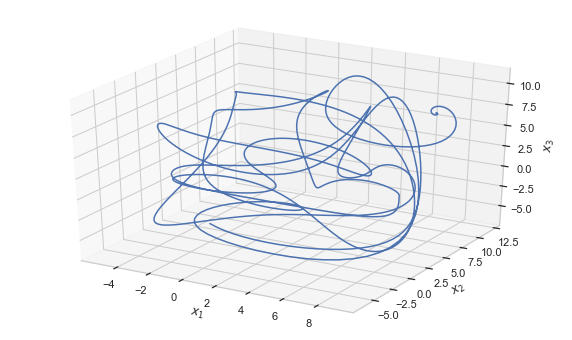

In [35]:
# Plot the first three variables
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x_ls[:, 0], x_ls[:, 1], x_ls[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

## リアプノフ指数の計算
正確にやるためには何が必要？

->　アトラクター上の様々な点から計測する

とりあえず1年分スピンアップで捨てた後ノイズを加えたものと加えていないものの誤差を測定する

In [9]:
year = 73.0
ly_data = l96_loop(x0, 10 * year)

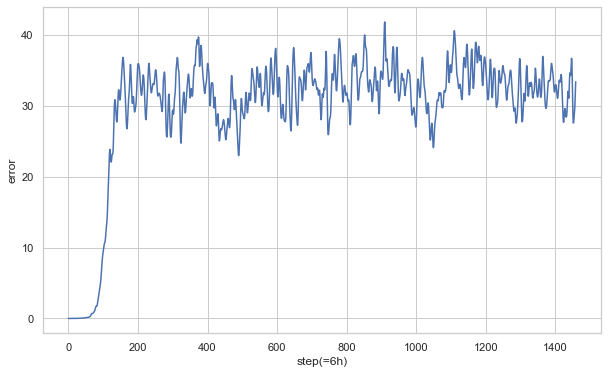

In [36]:
y = 1.0
#while y <= 10.0:
base = ly_data[int(y * year * 100)]
noise = np.zeros_like(base)
noise[0] += 0.01
out = l96_loop(base, year) - l96_loop(base+noise, year)
out = np.linalg.norm(out,axis=1)
plt.plot(out[::5])
plt.xlabel('step(=6h)')
plt.ylabel('error')
plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

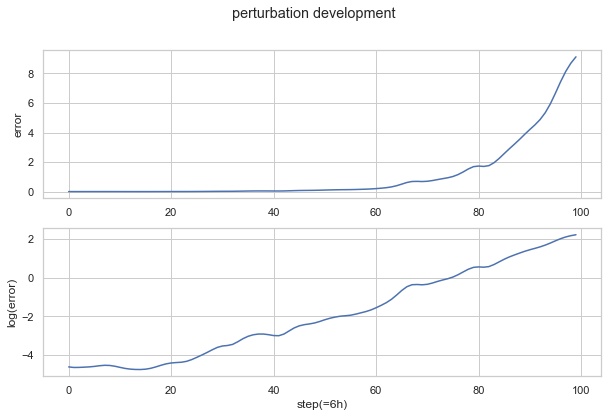

In [37]:
out_zoom = out[:500]
out_zoom = out_zoom[::5]
fig, ax = plt.subplots(2)
fig.suptitle('perturbation development')
ax[0].plot(out_zoom)
ax[1].plot(np.log(out_zoom))
ax[1].set_xlabel('step(=6h)')
ax[0].set_ylabel('error')
ax[1].set_ylabel('log(error)')
plt.show

リアプノフ指数>0であることがわかった。つまりカオスであると定義される。

しかし200step付近で誤差の成長が止まる。この誤差は２つの適当なアトラクターの平均的な差に当たるものだと考える。

# 2年分足し合わせる
2 * 365 * 4 * 0.05 = 146.0 step必要

In [12]:
twoy = 146.0
data = l96_loop(x0, twoy)
print(data.shape)
data = data[::5] # 6hごとに圧縮
data = data[int(data.shape[0]/2):] # ２年めのみを使う
print(data.shape)

(14600, 40)
(1460, 40)


In [13]:
print(data[0])

[ 3.73972009  5.0818905   1.8831919  -2.96759682  2.09667497  2.91926057
 10.26754184 -2.61767505 -1.20824939 -0.99769068  2.17496582  6.47420229
  1.27741554 -3.35782869 -0.17156987 -5.28834285 -0.36133256  9.38708514
  7.02829646  6.1431077   4.03196919 -2.69435818  3.45771701 11.95515543
  1.45649789 -1.06537432  1.35330969 -0.17528414  2.55640281  6.3852554
  6.18010162  1.696851   -1.87662797 -0.11911194  4.66623823  9.10878121
  0.22889094  1.16859856 -1.66642582  1.60676217]


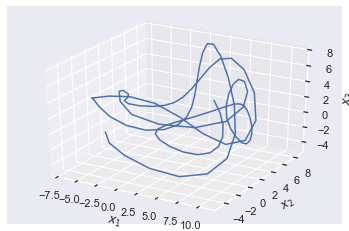

In [14]:
# Plot the first three variables
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data[:100, 0], data[:100, 1], data[:100, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

[ 2.09016659 -2.80753885 -1.86428962 -0.90477965 -0.23258449 -0.72366179
 -3.01939768 -1.50302508  0.58955448 -0.02845634 -1.29613361 -1.42771326
 -0.44838049  0.86976581  0.50087338 -1.26737246 -0.46012377 -0.04817937
 -0.64591441  1.17754094  1.6582209  -0.24358513  1.41434633  1.34356408
 -0.16631833  0.46052172 -1.23988025  0.07139655  0.43454689 -0.2260242
  1.02134779  0.77297058  1.00094081  1.43223114 -2.19416313 -0.67971899
 -0.48576107  0.22981514  2.15199244 -0.88241178]


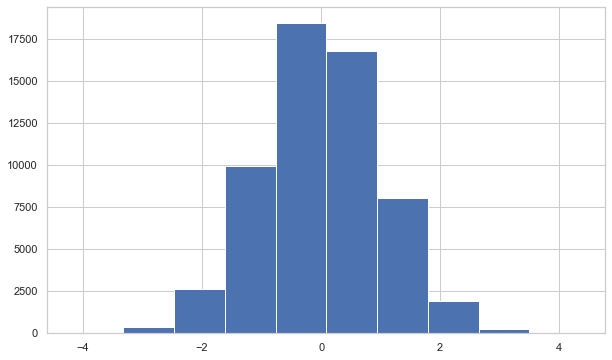

In [38]:
random_ls = np.random.randn(data.shape[0], data.shape[1])
print(random_ls[0])
plt.hist(np.ravel(random_ls))
plt.show()

In [14]:
data_noise = data + random_ls
np.savetxt("data/data.txt", data)
np.savetxt("datadata_noise.txt", data_noise)

In [17]:
# if data exists
data_noise = np.loadtxt("data/data_noise.txt")
data = np.loadtxt("data/data.txt")

# KF

In [18]:
a = 25
delta = 0.0001

In [19]:
x_s = data_noise[0]
p_s = a * np.eye(N)
x_a = random_xa(x_s)
p_a = a * np.eye(N)
H = np.eye(N)
R = np.eye(N)
error_x_ls = []
p_ls = []
noise_ls = []
error_x_ls.append(RMSE(x_a, data[0]))
p_ls.append(np.trace(p_a))
noise_ls.append(RMSE(data_noise[0], data[0]))

for i in range(1,500):#data_noise.shape[0]
    if i % 200 == 0:
        print(i)
    m = np.zeros((N, N))
    for j in range(0, N):
        e_j = np.zeros((N))
        e_j[j] = delta
        m[:, j] = (l96_synoptic(x_a + e_j) - l96_synoptic(x_a)) / delta
    x_f = l96_synoptic(x_a)
    p_f = m @ p_a @ m.T
    K = p_f @ H.T @ np.linalg.inv(H @ p_f @ H.T + R)
    x_a = x_f + K @ (data_noise[i] - H @ x_f)
    p_a = (np.eye(N) - K @ H) @ p_f
    p_a = p_a * 1.2
    error_x_ls.append(RMSE(x_a, data[i]))
    p_ls.append(np.trace(p_a))
    noise_ls.append(RMSE(data_noise[i], data[i]))

200
400


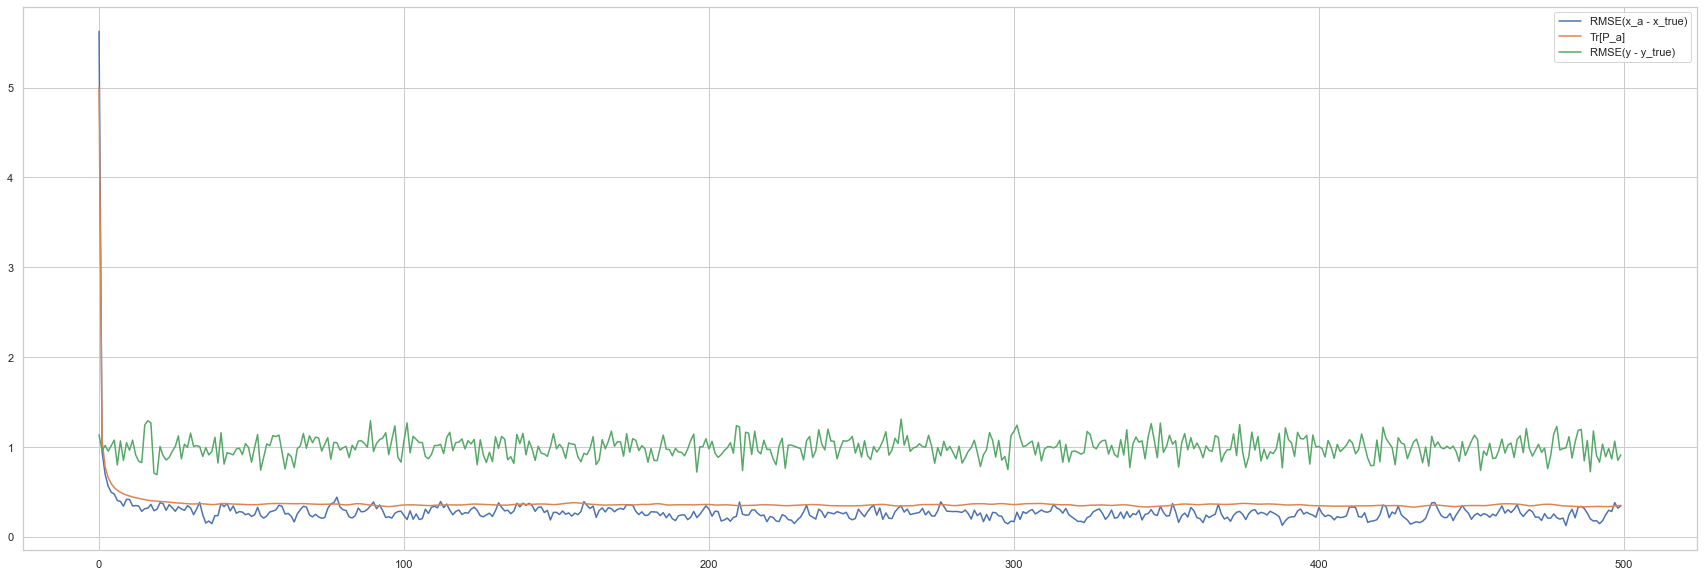

In [39]:
error_x_np = np.array(error_x_ls)
p_np = np.sqrt(np.array(p_ls) / N)
noise_np = np.array(noise_ls)
plt.figure(figsize=(30, 10))
plt.plot(error_x_np, label="RMSE(x_a - x_true)")
plt.plot(p_np, label="Tr[P_a]")
plt.plot(noise_np, label="RMSE(y - y_true)")
plt.legend()
plt.savefig("kf_param.png")
plt.show()


In [27]:
error_x_np[400:].mean()

0.2519683485757642

### 

# インフレーションを変えて実験

In [28]:
def inflation(param):
    x_s = data_noise[0]
    p_s = a * np.eye(N)
    x_a = random_xa(x_s)
    p_a = a * np.eye(N)
    H = np.eye(N)
    R = np.eye(N)
    error_x_ls = []
    p_ls = []
    noise_ls = []
    error_x_ls.append(RMSE(x_a, data[0]))
    p_ls.append(np.trace(p_a))
    noise_ls.append(RMSE(data_noise[0], data[0]))

    for i in range(1,600):#data_noise.shape[0]
        if i % 200 == 0:
            print(i)
        m = np.zeros((N, N))
        for j in range(0, N):
            e_j = np.zeros((N))
            e_j[j] = delta
            m[:, j] = (l96_synoptic(x_a + e_j) - l96_synoptic(x_a)) / delta
        x_f = l96_synoptic(x_a)
        p_f = m @ p_a @ m.T
        K = p_f @ H.T @ np.linalg.inv(H @ p_f @ H.T + R)
        x_a = x_f + K @ (data_noise[i] - H @ x_f)
        p_a = (np.eye(N) - K @ H) @ p_f
        p_a = p_a * param
        error_x_ls.append(RMSE(x_a, data[i]))
        p_ls.append(np.trace(p_a))
        noise_ls.append(RMSE(data_noise[i], data[i]))
    error_x_np = np.array(error_x_ls)
    return error_x_np[200:].mean()

In [110]:
num_infls = 10
infl_param_ls = np.linspace(1.0, 1.5, num_infls)
infl_error_ls = np.zeros((num_infls))
for i in range(num_infls):
    print("start infl {}".format(infl_param_ls[i]))
    infl_error_ls[i] = inflation(infl_param_ls[i])

200
400
200
400
200
400
200
400
200
400
200
400
200
400
200
400
200
400
200
400


In [120]:
infl_error_np = np.array(infl_error_ls)
np.savetxt("data/infl_error", infl_error_np)
np.savetxt("data/infl_param", infl_param_ls)

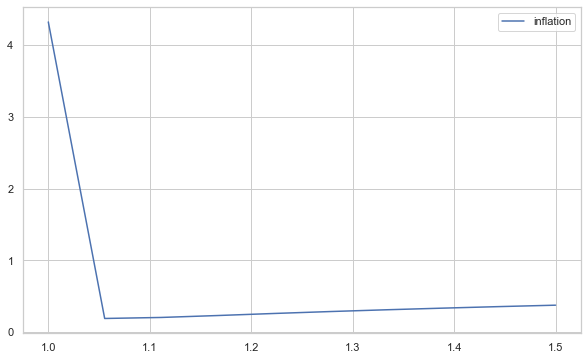

In [68]:
infl_error_np = np.loadtxt("data/infl_error")
infl_param_ls = np.loadtxt("data/infl_param")
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(infl_param_ls, infl_error_np, label="inflation")
plt.legend()
plt.savefig("infl.png")
plt.show()


In [30]:
infl_error_np

array([4.31758134, 0.19293856, 0.20709219, 0.23377569, 0.26236457,
       0.28922762, 0.31399246, 0.33673057, 0.35808045, 0.37785127])

# 3D-Var


In [44]:

x_s = data_noise[0]
p_s = a * np.eye(N)
x_a = random_xa(x_s)
p_a = a * np.eye(N)
H = np.eye(N)
R = np.eye(N)
B = 1 * np.eye(N)
error_x_ls = []
p_ls = []
noise_ls = []
error_x_ls.append(RMSE(x_a, data[0]))
p_ls.append(np.trace(p_a))
noise_ls.append(RMSE(data_noise[0], data[0]))

for i in range(1,600):#data_noise.shape[0]
    if i % 200 == 0:
        print(i)
    x_f = l96_synoptic(x_a)
    K = B @ H.T @ np.linalg.inv(H @ B @ H.T + R)
    x_a = x_f + K @ (data_noise[i] - H @ x_f)
    p_a = (np.eye(N) - K @ H) @ p_f
    error_x_ls.append(RMSE(x_a, data[i]))
    noise_ls.append(RMSE(data_noise[i], data[i]))

200
400


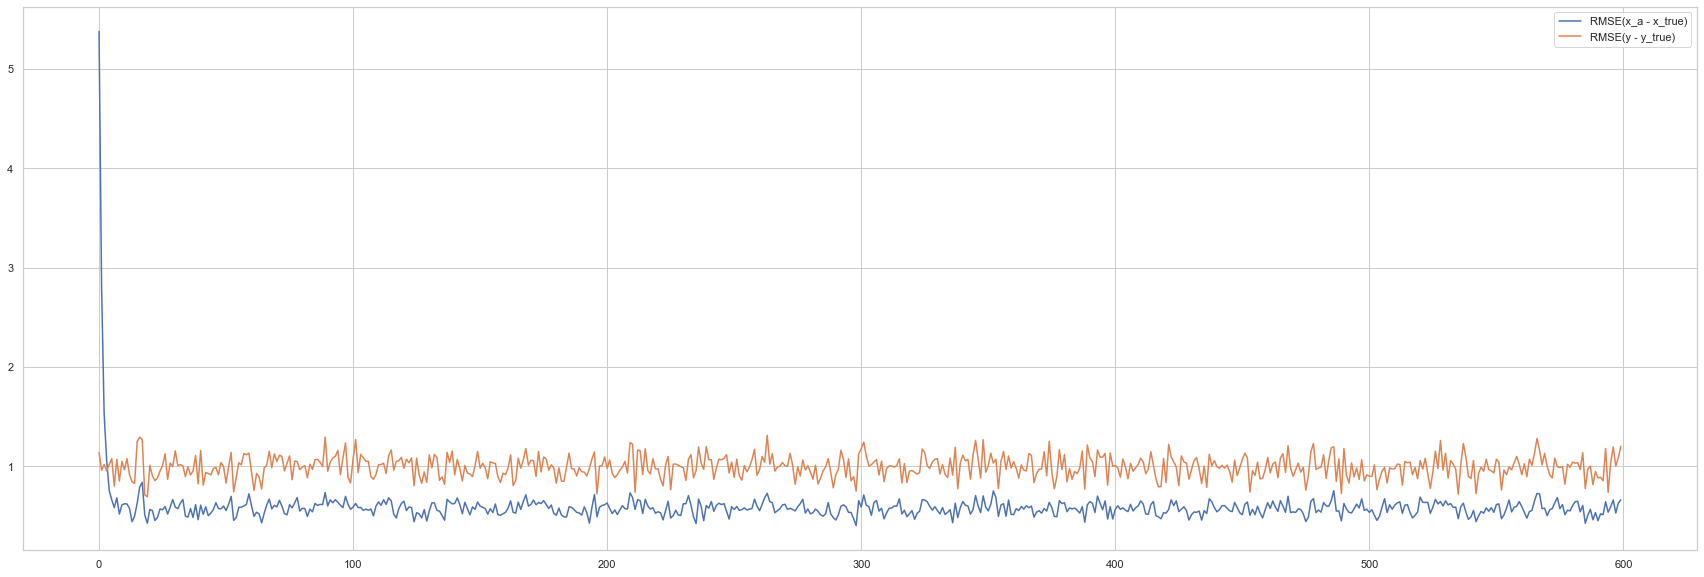

In [45]:
error_x_np = np.array(error_x_ls)
noise_np = np.array(noise_ls)
plt.figure(figsize=(30, 10))
plt.plot(error_x_np, label="RMSE(x_a - x_true)")
plt.plot(noise_np, label="RMSE(y - y_true)")
plt.legend()
plt.savefig("graph/3dvar.png")
plt.show()

In [53]:
def searchb(param):

    x_s = data_noise[0]
    p_s = a * np.eye(N)
    x_a = random_xa(x_s)
    p_a = a * np.eye(N)
    H = np.eye(N)
    R = np.eye(N)
    B = param * np.eye(N)
    error_x_ls = []
    p_ls = []
    noise_ls = []
    error_x_ls.append(RMSE(x_a, data[0]))
    p_ls.append(np.trace(p_a))
    noise_ls.append(RMSE(data_noise[0], data[0]))

    for i in range(1,600):#data_noise.shape[0]
        x_f = l96_synoptic(x_a)
        K = B @ H.T @ np.linalg.inv(H @ B @ H.T + R)
        x_a = x_f + K @ (data_noise[i] - H @ x_f)
        p_a = (np.eye(N) - K @ H) @ p_f
        error_x_ls.append(RMSE(x_a, data[i]))
        noise_ls.append(RMSE(data_noise[i], data[i]))
    error_x_np = np.array(error_x_ls)
    return error_x_np[200:].mean()

In [65]:
num_b = 10
b_param_ls = np.arange(0.1, 1.1 , 0.1)
b_error_ls = np.zeros((num_b))
for i in range(num_b):
    print("start infl {}".format(b_param_ls[i]))
    b_error_ls[i] = searchb(b_param_ls[i])

start infl 0.1
start infl 0.2
start infl 0.30000000000000004
start infl 0.4
start infl 0.5
start infl 0.6
start infl 0.7000000000000001
start infl 0.8
start infl 0.9
start infl 1.0


In [66]:
b_param_ls

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

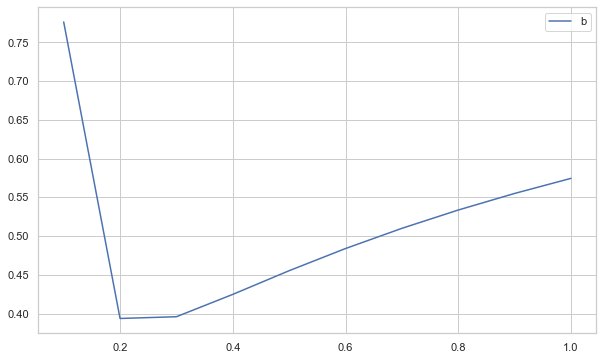

In [67]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(b_param_ls, b_error_ls, label="b")
plt.legend()
plt.savefig("b.png")
plt.show()


# NMC

# 解析アンサンブル

In [90]:
def del_tvar(del_num, param):
    x_s = data_noise[0]
    p_s = a * np.eye(N)
    x_a = random_xa(x_s)
    p_a = a * np.eye(N)
    del_key = np.random.choice(N, del_num, replace=False)
    H = np.eye(N)
    H = np.delete(H, del_key, 0)
    R = np.eye(N - del_num)
    B = param * np.eye(N)
    
    error_x_ls = []
    error_x_ls.append(RMSE(x_a, data[0]))

    for i in range(1,600):#data_noise.shape[0]
        x_f = l96_synoptic(x_a)
        K = B @ H.T @ np.linalg.inv(H @ B @ H.T + R)
        y = np.delete(data_noise[i], del_key)
        x_a = x_f + K @ (y - H @ x_f)
        p_a = (np.eye(N) - K @ H) @ p_f
        
        error_x_ls.append(RMSE(x_a, data[i]))
    error_x_np = np.array(error_x_ls)
    return error_x_np[200:].mean()

# 観測を抜く 3d-var

In [ ]:
num_b = 2
error_ls = np.zeros((N, num_b))
for del_num in tqdm(range(0, N)):
    b_param_ls = np.linspace(0.1, 5.0 , num_b)
    for i in range(num_b):
        error_ls[del_num, i] = del_tvar(del_num, b_param_ls[i])

  0%|          | 0/39 [00:00<?, ?it/s]